# The Battle of Neighbourhoods

## Open a Mediterranean food restaurant in Toronto

### 1. Introduction | Business Proposal

Growing immigration from many countries around the world to Canada in the last decade has increased globalization in different cities. Specifically, in the city of Toronto, restaurants of different nationalities have opened, including Chinese, Japanese, Indian, among others.

The objective of this project is to find out if among all these gastronomies of the world, there is a place in Toronto for the famous "Mediterranean gastronomy". It is well known that Mediterranean gastronomy is one of the healthiest in the world because it uses among its main ingredients fresh and quality products, such as vegetables, fruits, virgin olive oil, etc.

Thanks to this project, we will be able to know if opening a Mediterranean cuisine restaurant in Toronto is a viable project or not. This project may be useful for entrepreneurs who are looking to invest in a restaurant in a neighborhood in Toronto. On the other hand, the target audience will be all people who have an exquisite palate and want to taste the flavors of Mediterranean cuisine.

### 2. Data description

We will use the dataset obtained in week. This contains the latitudes, longitudes and zip codes of Canada. This dataset can be found in: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

Taking into account the needs of our project, determining factors to establish a restaurant of Mediterranean gastronomy will be:

- location of the neighborhood in the city of Toronto,
- Mediterranean restaurants in the neighborhood, in case there are any.

**Foursquare API Data**
To get the data for the different neighborhoods of Toronto in Canada, we will use the Foursquare API. As in week 3 of the course, we will get location information of the venues.

The data obtained from Foursquare are: Neighborhood, Neighborhood latitude, Neighborhood Longitude, Venue, Name of the Venue, Venue latitude, Venue longitude, and Venue category.

**Libraries**:
- Pandas: to create and manipulate dataframes.
- Scikit learn: to use k-means clustering.
- Numpy: to support the creation of multidimensional arrays and vectors.
- Matplotlib: to create plots.
- Geocoder: to retrieve location data.
- Folium: map rendering library.
- JSON: to handle JSON files.
- Requests: to handle requests.

**Unsupervised machine learning**

For this project we will use the unsupervised learning algorithm k-means to segment and cluster the data and thus obtain enough information to know in which place is more appropriate to open a restaurant of Mediterranean gastronomy.

### 3. Methodology

#### Importing required libraries 

In [41]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

import json # library to handle JSON files

import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Reading the data and importing it into the dataframe (Data Collection)

In [26]:
df_raw = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")[0]
df_raw # The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [27]:
# Printing summary of the df_raw
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Postal Code    180 non-null    object
 1   Borough        180 non-null    object
 2   Neighbourhood  180 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


#### Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [28]:
df = df_raw[df_raw['Borough']!='Not assigned']
df

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


#### More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma.

In [49]:
df_pc = df.groupby('Postal Code', sort = False).agg(', '.join)
df_pc.head(10)

,Borough,Neighbourhood
Postal Code,,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"
M3B,North York,Don Mills
M4B,East York,"Parkview Hill, Woodbine Gardens"


#### If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [50]:
df_pc.loc[df_pc['Neighbourhood'] == 'Not assigned', 'Neighbourhood'] = df_pc.loc[df_pc['Neighbourhood'] == 'Not assigned', 'Borough']
df_pc.reset_index(inplace = True)
df_pc.head(10)  

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [51]:
df_pc.shape # 103 rows and 3 columns in the dataframe df_pc

(103, 3)

#### Reading geospatial data

In [52]:
df_geo = pd.read_csv('http://cocl.us/Geospatial_data')
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


#### Obtaining info from the df_geo

In [53]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Postal Code  103 non-null    object 
 1   Latitude     103 non-null    float64
 2   Longitude    103 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


#### Checking shapes from both dfs

In [54]:
print("Shape of df_geo: {}, and shape of df_pc: {}".format(df_geo.shape, df_pc.shape))

Shape of df_geo: (103, 3), and shape of df_pc: (103, 3)


#### Merging both dfs by Postal Code

In [55]:
df_pc = pd.merge(df_pc, df_geo, on = 'Postal Code')
df_pc

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


#### Obtaining new info of df_pc merged

In [56]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Postal Code    103 non-null    object 
 1   Borough        103 non-null    object 
 2   Neighbourhood  103 non-null    object 
 3   Latitude       103 non-null    float64
 4   Longitude      103 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


In [57]:
print("Shape of df_pc: {}".format(df_pc.shape)) # 103 row per 5 columns

Shape of df_pc: (103, 5)


#### Data Visualization

Exploratory Data Analysis to understand better how many neighborhoods are

In [58]:
neigh_tor = df_pc.groupby('Borough')['Neighbourhood'].nunique()
neigh_tor

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
East York            5
Etobicoke           12
Mississauga          1
North York          20
Scarborough         17
West Toronto         6
York                 5
Name: Neighbourhood, dtype: int64

#### Plot the data

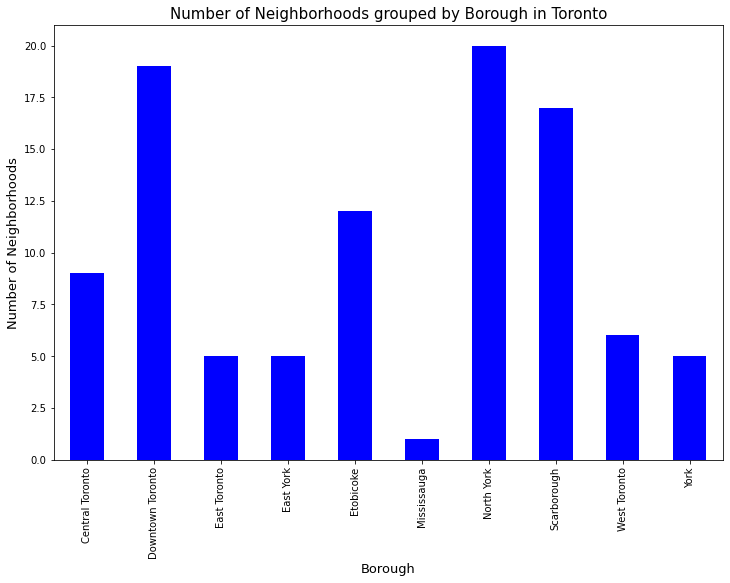

In [59]:
fig = plt.figure(figsize = (12, 8))

ax = neigh_tor.plot(kind = 'bar', color = 'blue')
ax.set_title('Number of Neighborhoods grouped by Borough in Toronto', fontsize = 15)
ax.set_xlabel('Borough', fontsize = 13)
ax.set_ylabel('Number of Neighborhoods', fontsize = 13)
plt.show()

#### North York is the borough with the greatest number of neighborhoods. Downtown Toronto is the borough with the second largest number of neighborhoods. 

#### Using Foursquare API 

In [60]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="canada_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Create a map of Toronto with neighborhoods superimposed on top

In [61]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_pc['Latitude'], df_pc['Longitude'], df_pc['Borough'], df_pc['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

map_toronto

#### Setting Foursquare Credentials

In [62]:
CLIENT_ID = 'NGLJLENJFP4RXWM4X04A2A0DH3OGECSQDTY1NPNU3G2IVZHC' # your Foursquare ID
CLIENT_SECRET = 'JV4YR0MZIQKGUQ1DLCPN02SDQEY1K45TIWBLRP445DQTG20K' # your Foursquare Secret
VERSION = '20210202' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NGLJLENJFP4RXWM4X04A2A0DH3OGECSQDTY1NPNU3G2IVZHC
CLIENT_SECRET:JV4YR0MZIQKGUQ1DLCPN02SDQEY1K45TIWBLRP445DQTG20K


### Explore Neighborhoods in Toronto

#### Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [63]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the above function on each neighborhood and create a new dataframe called toronto_venues_.

In [64]:
toronto_venues = getNearbyVenues(names=df_pc['Neighbourhood'],
                                   latitudes=df_pc['Latitude'],
                                   longitudes=df_pc['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

#### Printing 10 rows of toronto_venues

In [65]:
toronto_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Brookbanks Pool,43.751389,-79.332184,Pool
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
5,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
6,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place
7,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
8,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
9,"Regent Park, Harbourfront",43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center


#### Printing shape of toronto_venues

In [66]:
print(toronto_venues.shape)  # 2117 rows per 7 columns

(2117, 7)


#### Let's check how many venues were returned for each neighborhood

In [67]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",23,23,23,23,23,23
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,55,55,55,55,55,55
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",14,14,14,14,14,14


#### Let's find out how many unique categories can be curated from all the returned venues

In [68]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


## Analyze Each Neighborhood

In [99]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

#### Let's check for Mediterranean restaurants

In [101]:
toronto_onehot[toronto_onehot['Mediterranean Restaurant'] == 1].sum()

Yoga Studio                                                                        0
Accessories Store                                                                  0
Airport                                                                            0
Airport Food Court                                                                 0
Airport Gate                                                                       0
Airport Lounge                                                                     0
Airport Service                                                                    0
Airport Terminal                                                                   0
American Restaurant                                                                0
Antique Shop                                                                       0
Aquarium                                                                           0
Art Gallery                                                      

#### There are 6 Mediterranean restaurants. Sounds interesting.

#### Printing new dataframe size.

In [102]:
toronto_onehot.shape

(2117, 269)

#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [71]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0

#### Printing new size

In [72]:
toronto_grouped.shape

(96, 269)

#### Printing each neighborhood along with the top 5 most common venues

In [73]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0         Chinese Restaurant  0.25
1                     Lounge  0.25
2             Breakfast Spot  0.25
3  Latin American Restaurant  0.25
4                Yoga Studio  0.00


----Alderwood, Long Branch----
          venue  freq
0   Pizza Place  0.29
1      Pharmacy  0.14
2           Pub  0.14
3   Coffee Shop  0.14
4  Skating Rink  0.14


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                       Bank  0.09
1                Coffee Shop  0.09
2                Pizza Place  0.04
3                      Diner  0.04
4  Middle Eastern Restaurant  0.04


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4          Music Venue  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0         Coffee Shop  0.08
1      Sandwich Place  0.08
2  Italian 

                  venue  freq
0  Fast Food Restaurant  0.10
1                  Park  0.10
2        Sandwich Place  0.10
3           Pizza Place  0.05
4            Restaurant  0.05


----Kennedy Park, Ionview, East Birchmount Park----
              venue  freq
0  Department Store  0.25
1    Discount Store  0.25
2       Bus Station  0.25
3       Coffee Shop  0.25
4       Yoga Studio  0.00


----Kensington Market, Chinatown, Grange Park----
                           venue  freq
0                           Café  0.08
1                    Coffee Shop  0.07
2  Vegetarian / Vegan Restaurant  0.07
3          Vietnamese Restaurant  0.05
4             Mexican Restaurant  0.05


----Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens----
               venue  freq
0        Pizza Place  0.25
1  Mobile Phone Shop  0.25
2               Park  0.25
3     Sandwich Place  0.25
4              Motel  0.00


----Lawrence Manor, Lawrence Heights----
                    venue  freq
0    

4  Middle Eastern Restaurant  0.17


----Willowdale, Newtonbrook----
                venue  freq
0                 Gym   0.5
1           Piano Bar   0.5
2         Yoga Studio   0.0
3  Miscellaneous Shop   0.0
4               Motel   0.0


----Willowdale, Willowdale East----
              venue  freq
0  Ramen Restaurant  0.09
1     Shopping Mall  0.06
2       Coffee Shop  0.06
3        Restaurant  0.06
4              Café  0.06


----Willowdale, Willowdale West----
            venue  freq
0     Pizza Place  0.17
1  Discount Store  0.17
2        Pharmacy  0.17
3   Grocery Store  0.17
4     Coffee Shop  0.17


----Woburn----
                        venue  freq
0                 Coffee Shop  0.50
1                Soccer Field  0.25
2       Korean BBQ Restaurant  0.25
3                 Yoga Studio  0.00
4  Modern European Restaurant  0.00


----Woodbine Heights----
          venue  freq
0  Skating Rink  0.29
1      Bus Stop  0.14
2    Beer Store  0.14
3  Intersection  0.14
4          Park  

#### Inserting that into a _pandas_ dataframe

In [74]:
# Sorting the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [253]:
# Creating the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Lounge,Breakfast Spot,Latin American Restaurant,Yoga Studio,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Pub,Coffee Shop,Skating Rink,Gym,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Movie Theater
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Pizza Place,Diner,Middle Eastern Restaurant,Shopping Mall,Pharmacy,Mobile Phone Shop,Sandwich Place,Fried Chicken Joint
3,Bayview Village,Café,Japanese Restaurant,Bank,Chinese Restaurant,Music Venue,Museum,Movie Theater,Motel,Moroccan Restaurant,Monument / Landmark
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Women's Store,Thai Restaurant,Pharmacy,Comfort Food Restaurant,Pub,Restaurant,Café
5,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Beer Bar,Restaurant,Farmers Market,Bakery,Seafood Restaurant,Café,Liquor Store
6,"Birch Cliff, Cliffside West",Café,General Entertainment,Skating Rink,College Stadium,Pharmacy,Movie Theater,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant
7,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Nightclub,Bakery,Convenience Store,Furniture / Home Store,Bar,Climbing Gym,Stadium
8,"Business reply mail Processing Centre, South C...",Light Rail Station,Pizza Place,Restaurant,Brewery,Comic Shop,Skate Park,Burrito Place,Garden,Garden Center,Fast Food Restaurant
9,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Boutique,Harbor / Marina,Bar,Coffee Shop,Rental Car Location,Boat or Ferry,Sculpture Garden


## Cluster Neighborhoods

#### The first step to use k-means clustering is to determine the number of clusters to use.

In [254]:
from sklearn.metrics import silhouette_score
k = 50
k_values = []
sc = []

# kmeans++ for a better initialization of centroids
for k in range(2, k+1):
    df_cl = toronto_grouped.drop('Neighborhood', axis = 1)
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 40).fit_predict(df_cl)

    score = silhouette_score(df_cl, kmeans, metric = 'euclidean', random_state = 0)
    k_values.append(k)
    sc.append(score)

#### Plotting Silhouette score with different number of clusters

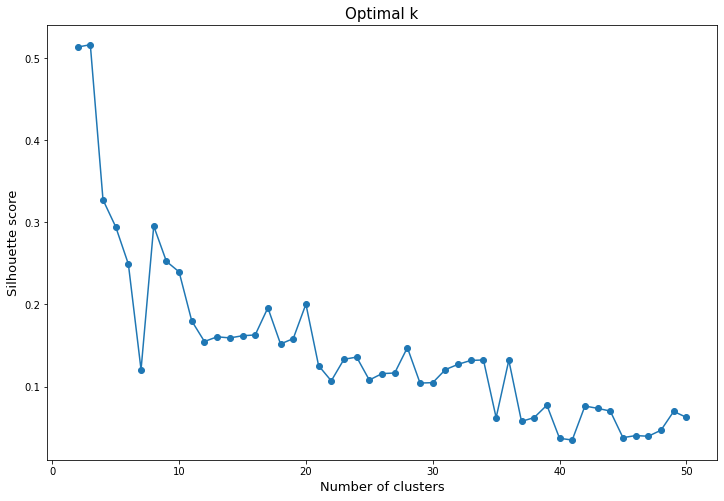

In [255]:
fig = plt.figure(figsize = (12,8))
plt.plot(k_values, sc, 'o-')
plt.title('Optimal k', fontsize = 15)
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Silhouette score', fontsize = 13)

plt.show()

In [256]:
print(k_values[0:10])
print(sc[0:10])

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.5137198031502376, 0.5166286648657628, 0.3275463434614149, 0.29474050061096707, 0.24927807804855537, 0.12048578322839436, 0.29557129636684626, 0.2525273926619521, 0.23975826603652947, 0.17989451390694086]


#### Taking into account the results of the silhouette score, we will use 3 clusters for our clustering model as this is the best result obtained.

In [257]:
# Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0])

In [258]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Lounge,Breakfast Spot,Latin American Restaurant,Yoga Studio,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Pub,Coffee Shop,Skating Rink,Gym,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Movie Theater
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Pizza Place,Diner,Middle Eastern Restaurant,Shopping Mall,Pharmacy,Mobile Phone Shop,Sandwich Place,Fried Chicken Joint
3,Bayview Village,Café,Japanese Restaurant,Bank,Chinese Restaurant,Music Venue,Museum,Movie Theater,Motel,Moroccan Restaurant,Monument / Landmark
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Women's Store,Thai Restaurant,Pharmacy,Comfort Food Restaurant,Pub,Restaurant,Café
5,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Beer Bar,Restaurant,Farmers Market,Bakery,Seafood Restaurant,Café,Liquor Store
6,"Birch Cliff, Cliffside West",Café,General Entertainment,Skating Rink,College Stadium,Pharmacy,Movie Theater,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant
7,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Nightclub,Bakery,Convenience Store,Furniture / Home Store,Bar,Climbing Gym,Stadium
8,"Business reply mail Processing Centre, South C...",Light Rail Station,Pizza Place,Restaurant,Brewery,Comic Shop,Skate Park,Burrito Place,Garden,Garden Center,Fast Food Restaurant
9,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Boutique,Harbor / Marina,Bar,Coffee Shop,Rental Car Location,Boat or Ferry,Sculpture Garden


#### Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [259]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_pc

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')


#### Drop NAN values

In [260]:
toronto_merged_clean = toronto_merged.dropna(subset=['Cluster Labels'])
toronto_merged_clean

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Food & Drink Shop,Pool,Park,Yoga Studio,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Pizza Place,Portuguese Restaurant,Coffee Shop,Hockey Arena,Yoga Studio,Modern European Restaurant,Movie Theater,Motel,Moroccan Restaurant,Monument / Landmark
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Bakery,Park,Pub,Breakfast Spot,Theater,Café,Farmers Market,Beer Store,Spa
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Clothing Store,Furniture / Home Store,Women's Store,Coffee Shop,Boutique,Gift Shop,Miscellaneous Shop,Vietnamese Restaurant,Event Space,Accessories Store
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Beer Bar,Restaurant,Burrito Place,Bar,Nightclub,Sandwich Place,Music Venue
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1.0,Fast Food Restaurant,Print Shop,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant
7,M3B,North York,Don Mills,43.745906,-79.352188,1.0,Gym,Beer Store,Coffee Shop,Restaurant,Japanese Restaurant,Smoke Shop,Sandwich Place,Sushi Restaurant,Chinese Restaurant,Clothing Store
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,1.0,Pizza Place,Breakfast Spot,Gym / Fitness Center,Pharmacy,Flea Market,Gastropub,Intersection,Bank,Athletics & Sports,Molecular Gastronomy Restaurant
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1.0,Clothing Store,Coffee Shop,Hotel,Bubble Tea Shop,Cosmetics Shop,Café,Middle Eastern Restaurant,Japanese Restaurant,Movie Theater,Ramen Restaurant
10,M6B,North York,Glencairn,43.709577,-79.445073,1.0,Bakery,Pizza Place,Asian Restaurant,Pub,Japanese Restaurant,Modern European Restaurant,Movie Theater,Motel,Moroccan Restaurant,Monument / Landmark


#### Finally, let's visualize the resulting clusters

In [261]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_clean['Latitude'], toronto_merged_clean['Longitude'], toronto_merged_clean['Neighbourhood'], toronto_merged_clean['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

#### Cluster 1

In [262]:
toronto_merged_clean[toronto_merged_clean['Cluster Labels'] == 0].nunique()

Postal Code               10
Borough                    6
Neighbourhood             10
Latitude                  10
Longitude                 10
Cluster Labels             1
1st Most Common Venue      6
2nd Most Common Venue      8
3rd Most Common Venue      7
4th Most Common Venue      6
5th Most Common Venue      5
6th Most Common Venue      5
7th Most Common Venue      6
8th Most Common Venue      6
9th Most Common Venue      6
10th Most Common Venue     7
dtype: int64

In [270]:
toronto_merged_clean.loc[toronto_merged_clean['Cluster Labels'] == 0, toronto_merged_clean.columns[[1] + [2] + list(range(5, toronto_merged_clean.shape[1]))]]

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Parkwoods,0.0,Food & Drink Shop,Pool,Park,Yoga Studio,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
21,York,Caledonia-Fairbanks,0.0,Park,Women's Store,Pool,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Mexican Restaurant
32,Scarborough,Scarborough Village,0.0,Playground,Convenience Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Music Venue,Mobile Phone Shop
35,East York,"East Toronto, Broadview North (Old East York)",0.0,Park,Intersection,Convenience Store,Yoga Studio,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant
61,Central Toronto,Lawrence Park,0.0,Bus Line,Swim School,Park,Yoga Studio,Mobile Phone Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop
64,York,Weston,0.0,Park,Yoga Studio,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant
66,North York,York Mills West,0.0,Convenience Store,Park,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Yoga Studio
83,Central Toronto,"Moore Park, Summerhill East",0.0,Tennis Court,Park,Trail,Playground,Pet Store,Motel,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant
85,Scarborough,"Milliken, Agincourt North, Steeles East, L'Amo...",0.0,Playground,Park,Intersection,Piano Bar,Movie Theater,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant
91,Downtown Toronto,Rosedale,0.0,Park,Playground,Trail,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant


#### Cluster 2

In [264]:
toronto_merged_clean[toronto_merged_clean['Cluster Labels'] == 1].nunique()

Postal Code               88
Borough                   10
Neighbourhood             84
Latitude                  88
Longitude                 67
Cluster Labels             1
1st Most Common Venue     34
2nd Most Common Venue     52
3rd Most Common Venue     52
4th Most Common Venue     54
5th Most Common Venue     45
6th Most Common Venue     55
7th Most Common Venue     50
8th Most Common Venue     47
9th Most Common Venue     46
10th Most Common Venue    50
dtype: int64

In [269]:
toronto_merged_clean.loc[toronto_merged_clean['Cluster Labels'] == 1, toronto_merged_clean.columns[[1] + [2] + list(range(5, toronto_merged_clean.shape[1]))]]

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,Victoria Village,1.0,Pizza Place,Portuguese Restaurant,Coffee Shop,Hockey Arena,Yoga Studio,Modern European Restaurant,Movie Theater,Motel,Moroccan Restaurant,Monument / Landmark
2,Downtown Toronto,"Regent Park, Harbourfront",1.0,Coffee Shop,Bakery,Park,Pub,Breakfast Spot,Theater,Café,Farmers Market,Beer Store,Spa
3,North York,"Lawrence Manor, Lawrence Heights",1.0,Clothing Store,Furniture / Home Store,Women's Store,Coffee Shop,Boutique,Gift Shop,Miscellaneous Shop,Vietnamese Restaurant,Event Space,Accessories Store
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",1.0,Coffee Shop,Sushi Restaurant,Yoga Studio,Beer Bar,Restaurant,Burrito Place,Bar,Nightclub,Sandwich Place,Music Venue
6,Scarborough,"Malvern, Rouge",1.0,Fast Food Restaurant,Print Shop,Miscellaneous Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Middle Eastern Restaurant
7,North York,Don Mills,1.0,Gym,Beer Store,Coffee Shop,Restaurant,Japanese Restaurant,Smoke Shop,Sandwich Place,Sushi Restaurant,Chinese Restaurant,Clothing Store
8,East York,"Parkview Hill, Woodbine Gardens",1.0,Pizza Place,Breakfast Spot,Gym / Fitness Center,Pharmacy,Flea Market,Gastropub,Intersection,Bank,Athletics & Sports,Molecular Gastronomy Restaurant
9,Downtown Toronto,"Garden District, Ryerson",1.0,Clothing Store,Coffee Shop,Hotel,Bubble Tea Shop,Cosmetics Shop,Café,Middle Eastern Restaurant,Japanese Restaurant,Movie Theater,Ramen Restaurant
10,North York,Glencairn,1.0,Bakery,Pizza Place,Asian Restaurant,Pub,Japanese Restaurant,Modern European Restaurant,Movie Theater,Motel,Moroccan Restaurant,Monument / Landmark
11,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",1.0,Bakery,Home Service,Yoga Studio,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop


#### Cluster 3

In [268]:
toronto_merged_clean.loc[toronto_merged_clean['Cluster Labels'] == 2, toronto_merged_clean.columns[[1] + [2] + list(range(5, toronto_merged_clean.shape[1]))]]

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,North York,"Humberlea, Emery",2.0,Baseball Field,Yoga Studio,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop,Market
101,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",2.0,Baseball Field,Yoga Studio,Mobile Phone Shop,Motel,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Miscellaneous Shop,Market


### 4. Results

The results show 3 clusters in the city of Toronto in Canada. We have searched for the 10 most common venues for each of the clusters obtained. It can be observed that some clusters are more suitable for having a restaurant. The results show that for cluster 1 there are 9 observations. These observations belong to 6 boroughs and we see that in none of the 3 most common venues a restaurant appears.

Cluster 2 is the cluster with the highest number of observations and therefore also has the highest number of restaurants among the 10 most common venues. Finally, cluster 3 has the lowest number of observations. Therefore, the number of restaurants is also much lower compared to the other two clusters. However, the top 2 venues show that baseball field and yoga studio are the most common.

### 5. Discussion

Analyzing the 3 clusters we can conclude that clusters 1 and 2 are the most appropriate when opening a restaurant, specifically, in our case, a Mediterranean food restaurant. 

For cluster 1, we observed Mediterranean food restaurants in the boroughs of Scarborough and Central Toronto, so establishing our restaurant in those boroughs would be the most appropriate for our business. In this cluster, up to the most common 5 venues, there are almost no restaurants, this could be due to the fact that people are more sporty as can be seen in different venues, such as: Park, tennis court, pool, and yoga studio.

Cluster 2 is the cluster that contains the most neighborhoods in the city of Toronto, with a total of 84 neighborhoods. In particular, the Hillcrest Village neighborhood, belonging to the borough of North York, has Mediterranean food restaurants in the third place. Therefore, we can think that the people of that neighborhood have a good reception to restaurants of this style. It is worth mentioning that the boroughs of Etobicoke, Scarborough, and York would also be good options to open the restaurant as they also have Mediterranean cuisine.

Finally, cluster 3 would not be an option when it comes to opening our restaurant because as seen in these neighborhoods, they are more inclined to healthy living as the most common venues. Although it seems that Moroccan food has also had a good acceptance.

### 6. Conclusion

We have successfully analyzed the neighborhoods of Toronto, Canada, to determine which would be the most suitable neighborhood to open our Mediterranean cuisine restaurant. Taking into account the analysis and the results obtained, the most propitious neighborhood is Hillcrest Village, located in the borough of North York, since it has a restaurant of this style among the 3 most common venues.

On the other hand, as a future work, it would be good to know other factors such as associated costs or transportation. These were not considered because they were out of scope.